# Open-Pit Mine Problem


***

# Dataset Kd
### Blocks file

In [ ]:
import pandas as pd

kd = "https://drive.google.com/uc?export=download&id=1jFUgPqyYEG9V6RfxeRWArzah8RtbGFP1"

blockmodel = pd.read_csv(kd, sep=',')

blockmodel

,xi,yi,zi,cu,density,mass,value,v_process,v_waste,id
0,0,0,0,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,1
1,0,0,1,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,2
2,0,0,2,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,3
3,0,0,3,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,4
4,0,0,4,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,5
...,...,...,...,...,...,...,...,...,...,...
50618,77,41,8,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,50619
50619,77,41,9,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,50620
50620,77,41,10,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,50621
50621,77,41,11,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0,50622


### Conversão Coordenada Índice

In [5]:
def coord2index(df, O, D, cols=['xi', 'yi', 'zi']):
    data = [D[i]*(df[cols].iloc[:, i] - 0.5) + O[i] for i in range(3)]
    return pd.DataFrame(data, index = ['x', 'y', 'z']).T

D = [20, 20, 15]  
O = [0, 0, 0]           

dados_em_index = coord2index(blockmodel, O, D)
blockmodel  = pd.concat([dados_em_index, blockmodel], axis = 1).round(2)

colunas_ordenadas = ['id','x', 'y', 'z', 'xi', 'yi', 'zi','cu', 'density','mass', 'value', 'v_process', 'v_waste']
blockmodel = blockmodel[colunas_ordenadas]

blockmodel.to_csv("Kd.blocks.csv", index=False)

blockmodel

,id,x,y,z,xi,yi,zi,cu,density,mass,value,v_process,v_waste
0,1,-10.0,-10.0,-7.5,0,0,0,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0
1,2,-10.0,-10.0,7.5,0,0,1,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0
2,3,-10.0,-10.0,22.5,0,0,2,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0
3,4,-10.0,-10.0,37.5,0,0,3,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0
4,5,-10.0,-10.0,52.5,0,0,4,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50618,50619,1530.0,810.0,112.5,77,41,8,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0
50619,50620,1530.0,810.0,127.5,77,41,9,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0
50620,50621,1530.0,810.0,142.5,77,41,10,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0
50621,50622,1530.0,810.0,157.5,77,41,11,0.0,2.73,16380.0,-81900.0,-278460.0,-81900.0


### Plotting the content graph caixote

Output()

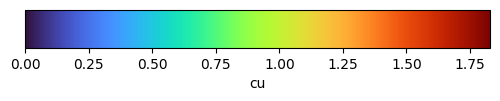

In [27]:
import numpy as np
import pandas as pd
import k3d
import matplotlib.pyplot as plt

# Filtra blocos com valor válido
df_filtrado = blockmodel.dropna(subset=['cu']).copy()

# Normaliza os valores de cu para 1–255 (evita índice 0)
min_val = df_filtrado['cu'].min()
max_val = df_filtrado['cu'].max()
df_filtrado['color_index'] = ((df_filtrado['cu'] - min_val) / (max_val - min_val) * 254 + 1).astype(np.uint8)

# Paleta Turbo
def turbo_palette():
    cmap = plt.get_cmap('turbo')
    return [int('0x' + ''.join(f'{int(c*255):02x}' for c in cmap(i/255)[:3]), 16) for i in range(256)]

colors = turbo_palette()
colors[0] = colors[1]  # força índice 0 a ser azul escuro

# Adiciona cor hexadecimal ao DataFrame
df_filtrado['color_hex'] = df_filtrado['color_index'].apply(lambda i: f'#{colors[i]:06x}')

# Define dimensões do grid
nx = df_filtrado['xi'].max() + 1
ny = df_filtrado['yi'].max() + 1
nz = df_filtrado['zi'].max() + 1

# Cria grid de cores e máscara
grid = np.zeros((nx, ny, nz), dtype=np.uint8)
mask = np.zeros((nx, ny, nz), dtype=bool)

for _, row in df_filtrado.iterrows():
    xi, yi, zi = int(row['xi']), int(row['yi']), int(row['zi'])
    grid[xi, yi, zi] = row['color_index']
    mask[xi, yi, zi] = True

# Corrige orientação para K3D: (z, y, x)
grid = np.transpose(grid, (2, 1, 0))
mask = np.transpose(mask, (2, 1, 0))
grid_masked = np.where(mask, grid, 0)

# Define limites reais para escala física
x_min, x_max = df_filtrado['x'].min(), df_filtrado['x'].max()
y_min, y_max = df_filtrado['y'].min(), df_filtrado['y'].max()
z_min, z_max = df_filtrado['z'].min(), df_filtrado['z'].max()
bounds = [x_min, x_max, y_min, y_max, z_min, z_max]

# Cria o plot interativo
plot = k3d.plot()
voxel_obj = k3d.voxels(grid_masked, color_map=colors, outlines=True, bounds=bounds)
plot += voxel_obj

# Adiciona legenda textual
label = k3d.text2d(f'cu: {min_val:.2f} – {max_val:.2f}', position=[0.01, 0.99], color=0x000000, size=1.2)
plot += label
plot.display()

# Exibe a colorbar visual com matplotlib
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = plt.get_cmap('turbo')
norm = plt.Normalize(min_val, max_val)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('cu')
plt.show()


### Plotting the mineral body content graph

C:\Users\Deivid\AppData\Local\Temp\ipykernel_25084\1743119738.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Deivid\AppData\Local\Temp\ipykernel_25084\1743119738.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Output()

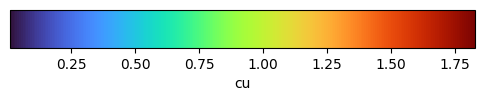

In [28]:
import numpy as np
import pandas as pd
import k3d
import matplotlib.pyplot as plt

# Filtra blocos com valor válido
df_filtrado = blockmodel[blockmodel['cu'] > 0]

# Normaliza os valores de cu para 1–255 (evita índice 0)
min_val = df_filtrado['cu'].min()
max_val = df_filtrado['cu'].max()
df_filtrado['color_index'] = ((df_filtrado['cu'] - min_val) / (max_val - min_val) * 254 + 1).astype(np.uint8)

# Paleta Turbo
def turbo_palette():
    cmap = plt.get_cmap('turbo')
    return [int('0x' + ''.join(f'{int(c*255):02x}' for c in cmap(i/255)[:3]), 16) for i in range(256)]

colors = turbo_palette()
colors[0] = colors[1]  # força índice 0 a ser azul escuro

# Adiciona cor hexadecimal ao DataFrame
df_filtrado['color_hex'] = df_filtrado['color_index'].apply(lambda i: f'#{colors[i]:06x}')

# Define dimensões do grid
nx = df_filtrado['xi'].max() + 1
ny = df_filtrado['yi'].max() + 1
nz = df_filtrado['zi'].max() + 1

# Cria grid de cores e máscara
grid = np.zeros((nx, ny, nz), dtype=np.uint8)
mask = np.zeros((nx, ny, nz), dtype=bool)

for _, row in df_filtrado.iterrows():
    xi, yi, zi = int(row['xi']), int(row['yi']), int(row['zi'])
    grid[xi, yi, zi] = row['color_index']
    mask[xi, yi, zi] = True

# Corrige orientação para K3D: (z, y, x)
grid = np.transpose(grid, (2, 1, 0))
mask = np.transpose(mask, (2, 1, 0))
grid_masked = np.where(mask, grid, 0)

# Define limites reais para escala física
x_min, x_max = df_filtrado['x'].min(), df_filtrado['x'].max()
y_min, y_max = df_filtrado['y'].min(), df_filtrado['y'].max()
z_min, z_max = df_filtrado['z'].min(), df_filtrado['z'].max()
bounds = [x_min, x_max, y_min, y_max, z_min, z_max]

# Cria o plot interativo
plot = k3d.plot()
voxel_obj = k3d.voxels(grid_masked, color_map=colors, outlines=True, bounds=bounds)
plot += voxel_obj

# Adiciona legenda textual
label = k3d.text2d(f'cu: {min_val:.2f} – {max_val:.2f}', position=[0.01, 0.99], color=0x000000, size=1.2)
plot += label
plot.display()

# Exibe a colorbar visual com matplotlib
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = plt.get_cmap('turbo')
norm = plt.Normalize(min_val, max_val)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('cu')
plt.show()
